In [17]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [45]:
#hacemos las importasciones de las librerias
from __future__ import absolute_import,division,print_function,unicode_literals
import os
#importamos keras y tensorflow
import tensorflow as tf
from tensorflow import keras

import time
import numpy as np
import matplotlib.pyplot as plt
#para cargar imagenes las siguientes
from PIL import Image
import requests
from io import BytesIO
# usaremos para re escalar imagenes
import cv2
import datetime

vamos a importar un data set de la libreria de keras vamos a hacer un modelo de entrenamiento con imagenes de prendas de vestir donde se encontraran las prendas de entramiento con sus etiquetas y luego tendremos el set de prueba con sus etiquetas 


In [48]:
fashion_mist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mist.load_data()

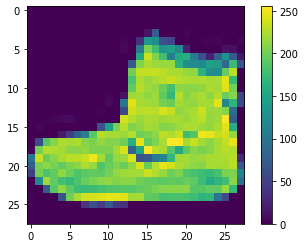

In [20]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

las etiquetas con una matrices de enteros q van del 0 al 9 estas corresponderan con la lista de imagenes

In [21]:
class_name=['camiseta','pantalon','sueter','vestido','abrigo','sandalia','camisa',
            'zapatilla deportiva','bolso','botines']

<h1>preprosesamiento de datos

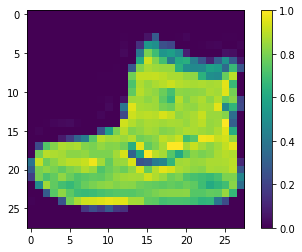

In [22]:
test_images=test_images /255
train_images=train_images /255
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

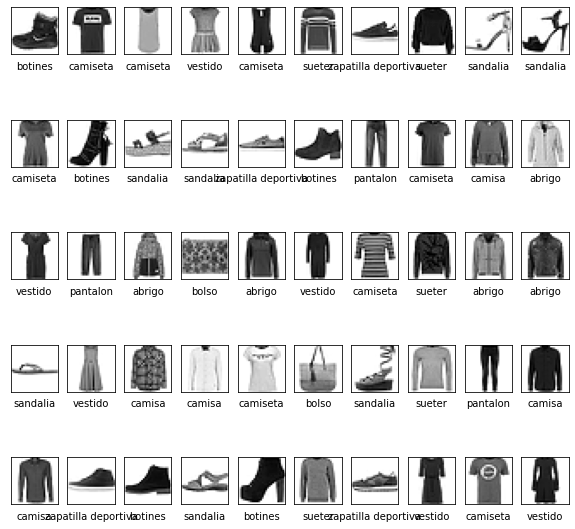

In [47]:
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_name[train_labels[i]])
plt.show

In [51]:
model=keras.Sequential([
    #capa de entrada con la forma de las imagenes
    keras.layers.Flatten(input_shape=(28,28)),
    #capa intermedia o hiden layer 
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')    
])

In [52]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [53]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
#loss='categorical_crossentropy'

In [54]:
check_point='checkpoints/check';
log_dir='log/fit/'+ datetime.datetime.now().strftime('%tY%m%d-$H$M$S')
cp_callbacks=tf.keras.callbacks.ModelCheckpoint(check_point,save_weights_only=True,verbose=1)
tensorboar_callback=tf.keras.callbacks.TensorBoard(log_dir,histogram_freq=1)



model.fit(train_images,train_labels,
          epochs=50,
          validation_data=(test_images,test_labels),
          callbacks=[cp_callbacks,tensorboar_callback]
         )
#en consola ejecuta tensorboard --logdir log/fit

Epoch 1/50
1875/1875 [==============================] - ETA: 0s - loss: 3.6004 - accuracy: 0.7049
Epoch 1: saving model to checkpoints/check
1875/1875 [==============================] - 5s 2ms/step - loss: 3.6004 - accuracy: 0.7049 - val_loss: 0.7693 - val_accuracy: 0.7152
Epoch 2/50
1863/1875 [============================>.] - ETA: 0s - loss: 0.6868 - accuracy: 0.7586
Epoch 2: saving model to checkpoints/check
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6867 - accuracy: 0.7588 - val_loss: 0.6286 - val_accuracy: 0.7733
Epoch 3/50
1875/1875 [==============================] - ETA: 0s - loss: 0.5959 - accuracy: 0.7921
Epoch 3: saving model to checkpoints/check
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5959 - accuracy: 0.7921 - val_loss: 0.6627 - val_accuracy: 0.7873
Epoch 4/50
1872/1875 [============================>.] - ETA: 0s - loss: 0.5638 - accuracy: 0.8025
Epoch 4: saving model to checkpoints/check
1875/1875 [==========================

Epoch 31/50
1861/1875 [============================>.] - ETA: 0s - loss: 0.4428 - accuracy: 0.8509
Epoch 31: saving model to checkpoints/check
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4429 - accuracy: 0.8507 - val_loss: 0.5846 - val_accuracy: 0.8277
Epoch 32/50
1873/1875 [============================>.] - ETA: 0s - loss: 0.4417 - accuracy: 0.8522
Epoch 32: saving model to checkpoints/check
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4417 - accuracy: 0.8522 - val_loss: 0.5714 - val_accuracy: 0.8257
Epoch 33/50
1850/1875 [============================>.] - ETA: 0s - loss: 0.4345 - accuracy: 0.8529
Epoch 33: saving model to checkpoints/check
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4338 - accuracy: 0.8530 - val_loss: 0.5669 - val_accuracy: 0.8281
Epoch 34/50
1870/1875 [============================>.] - ETA: 0s - loss: 0.4390 - accuracy: 0.8540
Epoch 34: saving model to checkpoints/check
1875/1875 [==================

In [28]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('Presision -> ',test_acc)

 48/313 [===>..........................] - ETA: 0s - loss: 0.3686 - accuracy: 0.8659 

2022-09-03 07:30:08.604314: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 0s 941us/step - loss: 0.3897 - accuracy: 0.8608
Presision ->  0.86080002784729


In [29]:
prediction=model.predict(test_images)


313/313 [==============================] - 0s 694us/step


In [30]:
prediction[0]

array([3.7797972e-06, 2.0551202e-10, 1.0057005e-06, 2.2911649e-07,
       6.8836903e-06, 7.2015800e-02, 1.9786428e-05, 3.5420057e-01,
       7.9414959e-04, 5.7295775e-01], dtype=float32)

In [31]:
np.argmax(prediction[0])

9

hacemos prediciones de imagenes de internet


In [33]:
#cargamos la imagen desde un link
response=requests.get('https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Camiseta-negra.jpg/200px-Camiseta-negra.jpg')
img=Image.open(BytesIO(response.content))
np_img=np.array(img)

#mostremos la imagen
plt.figure()
plt.imshow(np_img)
plt.colorbar()
plt.grid(False)
plt.show
#invertimos el color de la imagen
np_img=255-np_img
plt.figure()
plt.imshow(np_img)
plt.colorbar()
plt.grid(False)
plt.show


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7fa554c76750>

In [ ]:
np_img.shape

In [ ]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3],[0.333,0.333,0.333])

In [ ]:
bw_img=rgb2gray(np_img)

In [ ]:

plt.figure()
plt.imshow(bw_img)
plt.colorbar()
plt.grid(False)
plt.show

In [ ]:
bw_img.shape


In [ ]:
#escalamos la imagen
res=cv2.resize(bw_img,dsize=(28,28),interpolation=cv2.INTER_CUBIC)

In [ ]:
plt.figure()
plt.imshow(res)
plt.colorbar()
plt.grid(False)
plt.show

In [ ]:
res=res/255
plt.figure()
plt.imshow(res)
plt.colorbar()
plt.grid(False)
plt.show

In [ ]:
#colocamos la imagen en un array
x=np.zeros((1,28,28))
x.shape

In [ ]:
x[0]=np.array(res)

In [ ]:
predictions=model.predict(x)

In [ ]:
predictions

In [ ]:
index=np.arange(len(class_name))
plt.bar(index,predictions[0])
plt.ylabel('Confiabilidad',fontsize=15)
plt.xticks(index,class_name,fontsize=15,rotation=90)
plt.title('Prediciones')
plt.show()

<h1>Crearemos un nuevo modelo de entrenamiento

In [34]:
model2=keras.Sequential([
    #capa de entrada con la forma de las imagenes
    keras.layers.Flatten(input_shape=(28,28)),
    #capa intermedia o hiden layer 
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='softmax')    
])

In [35]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 50)                39250     
                                                                 
 dense_5 (Dense)             (None, 10)                510       
                                                                 
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [36]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
#loss='categorical_crossentropy'

In [39]:
test_loss,test_acc=model2.evaluate(test_images,test_labels)
print('Presision -> ',test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3897 - accuracy: 0.8608
Presision ->  0.86080002784729


In [38]:
# se usa para recargar pesos 
model2.load_weights(check_point)